# Anomaly Detection


## i. Introduction
Nama : Darmawan Wijaya </br>
Kelas : FTDS - 002 </br>
Obyektif : Mengaplikasikan anomaly detection dari data transaksi kartu kredit

## ii. Import Pustaka
Pustaka yang digunakan pada proyek ini adalah:</br>
1. Numpy
2. Pandas
3. Scikit Learn
4. Matplotlib
5. Seaborn

In [3]:
#Proses import dari pustaka yang digunakan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score



#Kode tambahan untuk menampilkan angka desimal maksimal 5 angka dibelakang koma sehingga angka lebih mudah dipahami
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## iii. Data Loading
Data yang digunakan adalah data transaksi kartu kredit. </br>
Namun dikarenakan kerahasiaan data, variabel yang disediakan merupakan variabel turunan dari PCA, dan variabel aslinya tidak dapat diberikan. </br>
Terdapat 2 Variabel selain hasil PCA yaitu Time yang berarti waktu antar transaksi dan Amount yang berarti jumlah transaksi</br>

Data tersebut dapat diunduh pada : https://www.kaggle.com/mlg-ulb/creditcardfraud


In [4]:
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


## iv. Data Cleaning
Data cleaning adalah proses penyiapan data sebelum dilakukan eksplorasi dan pengolahan data lebih lanjut. </br>
Proses data cleaning yang digunakan pada proyek ini adalah: </br>
1. Pengecekan Data Duplikat
2. Pengecekan Missing Values

In [6]:
#Proses Pengecekan Data Duplikat
duplicate = df[df.duplicated()]
duplicate

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.00000,-0.52991,0.87389,1.34725,0.14546,0.41421,0.10022,0.71121,0.17607,-0.28672,...,0.04695,0.20810,-0.18555,0.00103,0.09882,-0.55290,-0.07329,0.02331,6.14000,0
35,26.00000,-0.53539,0.86527,1.35108,0.14758,0.43368,0.08698,0.69304,0.17974,-0.28564,...,0.04953,0.20654,-0.18711,0.00075,0.09812,-0.55347,-0.07831,0.02543,1.77000,0
113,74.00000,1.03837,0.12749,0.18446,1.10995,0.44170,0.94528,-0.03671,0.35099,0.11895,...,0.10252,0.60509,0.02309,-0.62646,0.47912,-0.16694,0.08125,0.00119,1.18000,0
114,74.00000,1.03837,0.12749,0.18446,1.10995,0.44170,0.94528,-0.03671,0.35099,0.11895,...,0.10252,0.60509,0.02309,-0.62646,0.47912,-0.16694,0.08125,0.00119,1.18000,0
115,74.00000,1.03837,0.12749,0.18446,1.10995,0.44170,0.94528,-0.03671,0.35099,0.11895,...,0.10252,0.60509,0.02309,-0.62646,0.47912,-0.16694,0.08125,0.00119,1.18000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.00000,1.91255,-0.45524,-1.75065,0.45432,2.08913,4.16002,-0.88130,1.08175,1.02293,...,-0.52407,-1.33751,0.47394,0.61668,-0.28355,-1.08484,0.07313,-0.03602,11.99000,0
283483,171627.00000,-1.46438,1.36812,0.81599,-0.60128,-0.68911,-0.48715,-0.30378,0.88495,0.05406,...,0.28722,0.94783,-0.21877,0.08293,0.04413,0.63927,0.21356,0.11925,6.82000,0
283485,171627.00000,-1.45798,1.37820,0.81152,-0.60376,-0.71188,-0.47167,-0.28253,0.88065,0.05281,...,0.28420,0.94966,-0.21695,0.08325,0.04494,0.63993,0.21943,0.11677,11.93000,0
284191,172233.00000,-2.66794,3.16050,-3.35598,1.00784,-0.37740,-0.10973,-0.66723,2.30970,-1.63931,...,0.39148,0.26654,-0.07985,-0.09640,0.08672,-0.45113,-1.18374,-0.22220,55.66000,0


Terdapat 1.081 baris data yang dianggap duplikat, dan untuk data tersebut untuk selanjutnya akan dihapus

In [7]:
#Penghapusan data duplikat
df_cleaned = df.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [8]:
#Pengecekan data missing values
df_cleaned.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tidak ditemukan adanya missing values pada dataset

## v. Data Exploration

In [9]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [10]:
df_cleaned.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00000,-1.35981,-0.07278,2.53635,1.37816,-0.33832,0.46239,0.23960,0.09870,0.36379,...,-0.01831,0.27784,-0.11047,0.06693,0.12854,-0.18911,0.13356,-0.02105,149.62000,0
1,0.00000,1.19186,0.26615,0.16648,0.44815,0.06002,-0.08236,-0.07880,0.08510,-0.25543,...,-0.22578,-0.63867,0.10129,-0.33985,0.16717,0.12589,-0.00898,0.01472,2.69000,0
2,1.00000,-1.35835,-1.34016,1.77321,0.37978,-0.50320,1.80050,0.79146,0.24768,-1.51465,...,0.24800,0.77168,0.90941,-0.68928,-0.32764,-0.13910,-0.05535,-0.05975,378.66000,0
3,1.00000,-0.96627,-0.18523,1.79299,-0.86329,-0.01031,1.24720,0.23761,0.37744,-1.38702,...,-0.10830,0.00527,-0.19032,-1.17558,0.64738,-0.22193,0.06272,0.06146,123.50000,0
4,2.00000,-1.15823,0.87774,1.54872,0.40303,-0.40719,0.09592,0.59294,-0.27053,0.81774,...,-0.00943,0.79828,-0.13746,0.14127,-0.20601,0.50229,0.21942,0.21515,69.99000,0


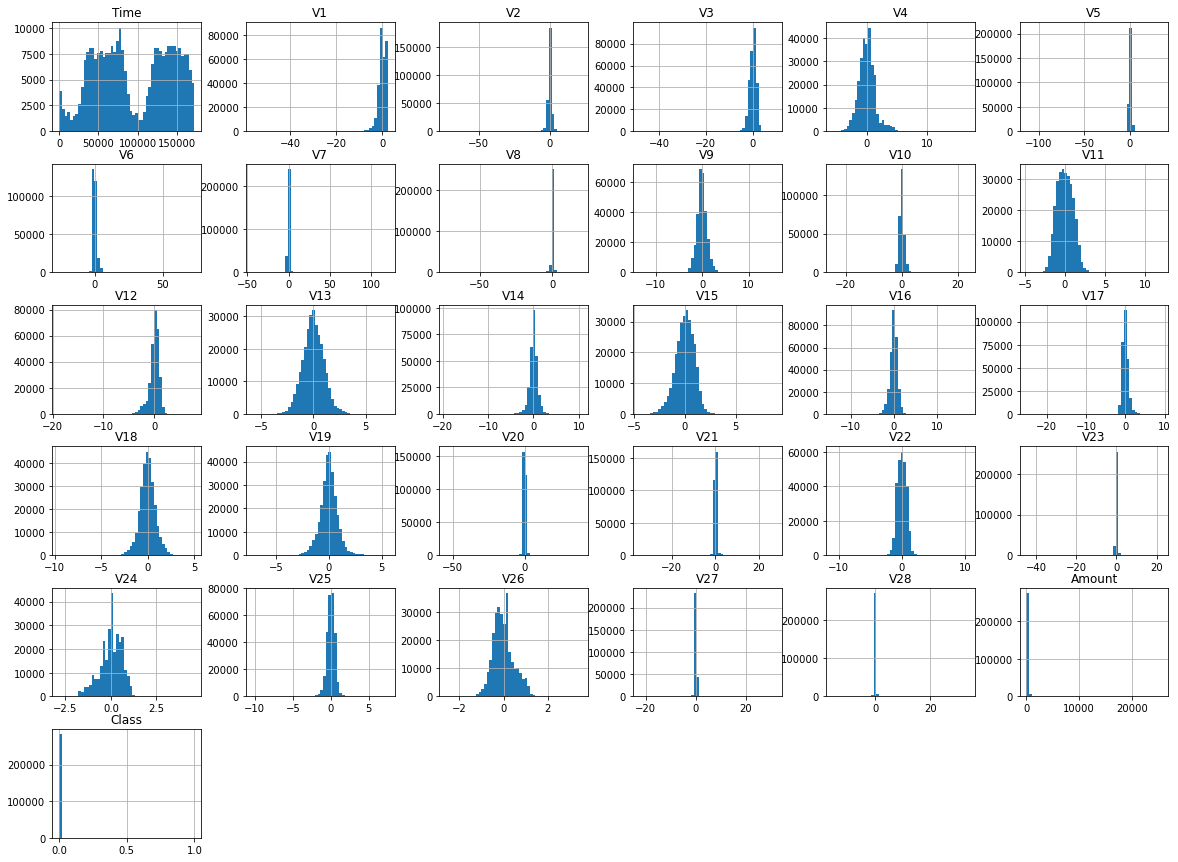

In [11]:
df_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
print (df_cleaned['Class'].value_counts())
print (df_cleaned['Class'].value_counts()*100/len(df_cleaned))

0    283253
1       473
Name: Class, dtype: int64
0   99.83329
1    0.16671
Name: Class, dtype: float64


<AxesSubplot:>

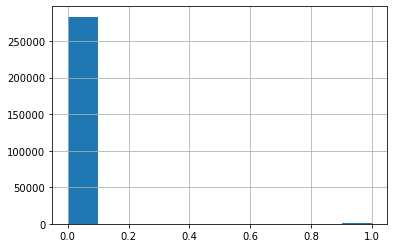

In [13]:
df_cleaned['Class'].hist()

Dari explorasi terhadap fitur 'Class', untuk fitur tersebut sangat imbalance. </br>
Dimana hanya terdapat 0.16% data fraud dari total data secara keseluruhan.

In [14]:
df_cleaned['Amount'].describe()

count   283726.00000
mean        88.47269
std        250.39944
min          0.00000
25%          5.60000
50%         22.00000
75%         77.51000
max      25691.16000
Name: Amount, dtype: float64

<AxesSubplot:>

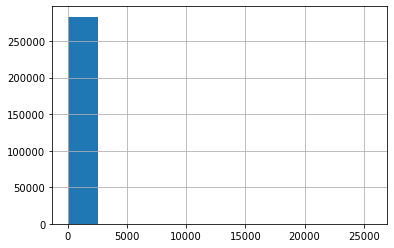

In [15]:
df_cleaned['Amount'].hist()

C:\Users\Wawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

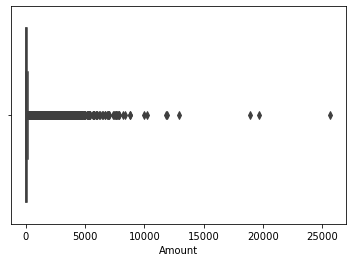

In [16]:
sns.boxplot(df_cleaned['Amount'])

Dari explorasi terhadap fitur 'Amount', untuk fitur tersebut juga sangat imbalance. </br>
Dimana hanya terdapat sebagian besar data memiliki nilai antara 0-22.

In [17]:
df_cleaned['Time'].describe()

count   283726.00000
mean     94811.07760
std      47481.04789
min          0.00000
25%      54204.75000
50%      84692.50000
75%     139298.00000
max     172792.00000
Name: Time, dtype: float64

<AxesSubplot:>

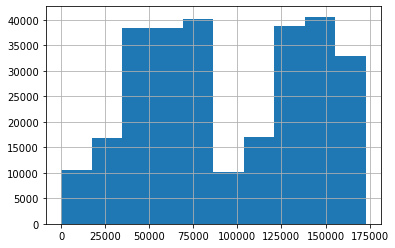

In [18]:
df_cleaned['Time'].hist()

C:\Users\Wawan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time'>

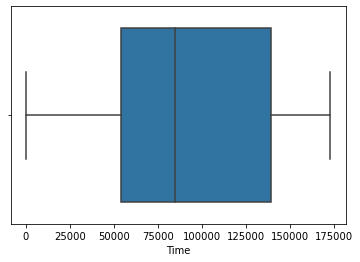

In [19]:
sns.boxplot(df_cleaned['Time'])

## vi. Data Preprocessing
Proses preprosesing data yang kami lakukan adalah dengan melakukan :
1. Resampling Data
2. Definisi X dan Y
3. Train Test Split
4. Scaling data

In [20]:
print (df_cleaned['Class'].value_counts())
print (df_cleaned['Class'].value_counts()*100/len(df_cleaned))

0    283253
1       473
Name: Class, dtype: int64
0   99.83329
1    0.16671
Name: Class, dtype: float64


Dikarenakan proporsi data non fraud dan fraud sangat tidak balance, maka kami melakukan resampling data. </br>
Resampling data kami lakukan dengan memilih proporsi data yang sama antara data fraud dan data non fraud </br>
Dikarenakan untuk data fraud terdapat 473 data, maka untuk data non fraud kami ambil data sebanyak 473 data juga.

In [21]:
dffraud = df_cleaned[df_cleaned['Class']==1]
dfnofraud=df_cleaned[df_cleaned['Class']==0][:473]

In [22]:
dfnofraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 0 to 479
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    473 non-null    float64
 1   V1      473 non-null    float64
 2   V2      473 non-null    float64
 3   V3      473 non-null    float64
 4   V4      473 non-null    float64
 5   V5      473 non-null    float64
 6   V6      473 non-null    float64
 7   V7      473 non-null    float64
 8   V8      473 non-null    float64
 9   V9      473 non-null    float64
 10  V10     473 non-null    float64
 11  V11     473 non-null    float64
 12  V12     473 non-null    float64
 13  V13     473 non-null    float64
 14  V14     473 non-null    float64
 15  V15     473 non-null    float64
 16  V16     473 non-null    float64
 17  V17     473 non-null    float64
 18  V18     473 non-null    float64
 19  V19     473 non-null    float64
 20  V20     473 non-null    float64
 21  V21     473 non-null    float64
 22  V2

In [23]:
df_resample = pd.concat([dffraud,dfnofraud])
df_resample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 541 to 479
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    946 non-null    float64
 1   V1      946 non-null    float64
 2   V2      946 non-null    float64
 3   V3      946 non-null    float64
 4   V4      946 non-null    float64
 5   V5      946 non-null    float64
 6   V6      946 non-null    float64
 7   V7      946 non-null    float64
 8   V8      946 non-null    float64
 9   V9      946 non-null    float64
 10  V10     946 non-null    float64
 11  V11     946 non-null    float64
 12  V12     946 non-null    float64
 13  V13     946 non-null    float64
 14  V14     946 non-null    float64
 15  V15     946 non-null    float64
 16  V16     946 non-null    float64
 17  V17     946 non-null    float64
 18  V18     946 non-null    float64
 19  V19     946 non-null    float64
 20  V20     946 non-null    float64
 21  V21     946 non-null    float64
 22  

In [24]:
#Proses definisi X dan Y
y = df_resample['Class'].values
X = df_resample.drop(columns=['Class'],axis=1).values

In [25]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
#Proses Scaling dari data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## vii. Pendefinisian Model
Pada dataset yang pada digunakan saat ini, terdapat label yang menandakan apakah data tersebut fraud ataukah tidak. </br>
Sehingga untuk anomaly detection dapat menggunakan model supervised maupun unsupervised. </br>
Kami akan menggunakan 2 pendekatan supervised dan unsupervised:
1. Untuk model supervised, kami akan melakukan model selection dengan menggunakan KFold untuk model Decision Tree, Random Forest, K Nearest Neighbour, dan Naive Bayes
2. Untuk model unsupervised, kami akan melakukan isolation forest, one class svm dan Local Outlier Factor

### Supervised Learning - Model Selection

In [27]:
# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))

In [28]:
# evaluate each model in turn
seed = 42
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.981230 (0.027748)
SVM: 0.981908 (0.017223)
DT: 0.997059 (0.008824)
RF: 0.997222 (0.008333)
KNN: 0.914381 (0.041234)
NB: 0.997222 (0.008333)


## Supervised Learning - Random Forest

In [29]:
# Definisi model random forest
randomforest = RandomForestClassifier()

In [30]:
randomforest.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
#Proses prediksi nilai Y berdasarkan variabel X_test
y_predrf = randomforest.predict(X_test)

y_predrf

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [32]:
#Perbandingan hasil nilai y aktual dengan nilai y hasil prediksi model logistic regression
predictedrf = pd.DataFrame({'Actual': y_test,'Predicted': y_predrf})
predictedrf.value_counts()

Actual  Predicted
0       0            102
1       1             88
dtype: int64

In [33]:
#Pembuatan confusion matrix
cmrf = confusion_matrix(y_test, y_predrf)
print('Confusion matrix\n\n', cmrf)

Confusion matrix

 [[102   0]
 [  0  88]]


In [34]:
#Perhitungan kategori dari Confusion Matrix
tprf = cmrf[1,1]
tnrf = cmrf[0,0]
fprf = cmrf[0,1]
fnrf = cmrf[1,0]

print('True Positives(TP) = ', tprf)
print('True Negatives(TN) = ', tnrf)
print('False Positives(FP) = ', fprf)
print('False Negatives(FN) = ', fnrf)

True Positives(TP) =  88
True Negatives(TN) =  102
False Positives(FP) =  0
False Negatives(FN) =  0


In [35]:
#Perhitungan evaluation metric
accurf = (tprf+tnrf)/(tprf+tnrf+fprf+fnrf)
misclassrf = (fnrf+fprf)/(tprf+tnrf+fprf+fnrf)
precisrf = tprf/(tprf+fprf)
sensirf = tprf/(tprf+fnrf)
specirf = tnrf/(tnrf+fprf) 
f1rf = 2 * (precisrf*sensirf) / (precisrf+sensirf)



print('Overall Accuracy of Random Forest is ',accurf)
print('Misclassification of Random Forest is ',misclassrf)
print('Precision of Random Forest is ',precisrf)
print('Sensitivity of Random Forest is ',sensirf)
print('Specificity of Random Forest is ',specirf)
print('F-1 Score of Random Forest is ',f1rf)

Overall Accuracy of Random Forest is  1.0
Misclassification of Random Forest is  0.0
Precision of Random Forest is  1.0
Sensitivity of Random Forest is  1.0
Specificity of Random Forest is  1.0
F-1 Score of Random Forest is  1.0


In [37]:
#Membuat Classification Report
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00        88

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



## Supervised Model - Gaussian Naiye Bayes

In [38]:
#Definisi Model Gaussian Naive Bayes
gnb = GaussianNB()

In [39]:
#Fitting Data
gnb.fit(X_train,y_train)

GaussianNB()

In [40]:
#Proses prediksi nilai Y berdasarkan variabel X_test
y_pred_gnb = gnb.predict(X_test)

y_pred_gnb

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [42]:
#Pembuatan confusion matrix
cmgnb = confusion_matrix(y_test, y_pred_gnb)
print('Confusion matrix\n\n', cmgnb)

#Perhitungan kategori dari Confusion Matrix
tpgnb = cmgnb[1,1]
tngnb = cmgnb[0,0]
fpgnb = cmgnb[0,1]
fngnb = cmgnb[1,0]

print('True Positives(TP) = ', tpgnb)
print('True Negatives(TN) = ', tngnb)
print('False Positives(FP) = ', fpgnb)
print('False Negatives(FN) = ', fngnb)

#Perhitungan evaluation metric
accugnb = (tpgnb+tngnb)/(tpgnb+tngnb+fpgnb+fngnb)
misclassgnb = (fngnb+fpgnb)/(tpgnb+tngnb+fpgnb+fngnb)
precisgnb = tpgnb/(tpgnb+fpgnb)
sensignb = tpgnb/(tpgnb+fngnb)
specignb = tngnb/(tngnb+fpgnb) 
f1gnb = 2 * (precisgnb*sensignb) / (precisgnb+sensignb)



print('Overall Accuracy of Gaussian Naive Bayes is ',accugnb)
print('Misclassgnbication of Gaussian Naive Bayes is ',misclassgnb)
print('Precision of Gaussian Naive Bayes is ',precisgnb)
print('Sensitivity of Gaussian Naive Bayes is ',sensignb)
print('Specificity of Gaussian Naive Bayes is ',specignb)
print('F-1 Score of Gaussian Naive Bayes is ',f1gnb)

#Membuat Classification Report
print(classification_report(y_test, y_pred_gnb))

Confusion matrix

 [[101   1]
 [  0  88]]
True Positives(TP) =  88
True Negatives(TN) =  101
False Positives(FP) =  1
False Negatives(FN) =  0
Overall Accuracy of Gaussian Naive Bayes is  0.9947368421052631
Misclassgnbication of Gaussian Naive Bayes is  0.005263157894736842
Precision of Gaussian Naive Bayes is  0.9887640449438202
Sensitivity of Gaussian Naive Bayes is  1.0
Specificity of Gaussian Naive Bayes is  0.9901960784313726
F-1 Score of Gaussian Naive Bayes is  0.9943502824858756
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      0.99        88

    accuracy                           0.99       190
   macro avg       0.99      1.00      0.99       190
weighted avg       0.99      0.99      0.99       190



## Unsupervised Learning - Isolation Forest

In [43]:
from sklearn.ensemble import IsolationForest

In [44]:
contamination = 0.5

In [45]:
isofor = IsolationForest(contamination=contamination, n_estimators=1000)
isofor.fit(X_train)

IsolationForest(contamination=0.5, n_estimators=1000)

In [46]:
y_pred_if = isofor.predict(X_test)


In [47]:
y_pred_if[y_pred_if == 1] = 0
y_pred_if[y_pred_if== -1] = 1

In [48]:
y_pred_if

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [49]:
predicteddf = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_if})
predicteddf.value_counts()

Actual  Predicted
0       0            85
1       1            76
0       1            17
1       0            12
dtype: int64

In [50]:
#Pembuatan confusion matrix
cmif = confusion_matrix(y_test, y_pred_if)
print('Confusion matrix\n\n', cmif)

Confusion matrix

 [[85 17]
 [12 76]]


In [51]:
#Perhitungan kategori dari Confusion Matrix
tpif = cmif[1,1]
tnif = cmif[0,0]
fpif = cmif[0,1]
fnif = cmif[1,0]

print('True Positives(TP) = ', tpif)
print('True Negatives(TN) = ', tnif)
print('False Positives(FP) = ', fpif)
print('False Negatives(FN) = ', fnif)

True Positives(TP) =  76
True Negatives(TN) =  85
False Positives(FP) =  17
False Negatives(FN) =  12


In [52]:
#Perhitungan evaluation metric
accuif = (tpif+tnif)/(tpif+tnif+fpif+fnif)
misclassif = (fnif+fpif)/(tpif+tnif+fpif+fnif)
precisif = tpif/(tpif+fpif)
sensiif = tpif/(tpif+fnif)
speciif = tnif/(tnif+fpif) 
f1if = 2 * (precisif*sensiif) / (precisif+sensiif)



print('Overall Accuracy of Isolation Forest is ',accuif)
print('Misclassification of Isolation Forest is ',misclassif)
print('Precision of Isolation Forest is ',precisif)
print('Sensitivity of Isolation Forest is ',sensiif)
print('Specificity of Isolation Forest is ',speciif)
print('F-1 Score of Isolation Forest is ',f1if)

Overall Accuracy of Isolation Forest is  0.8473684210526315
Misclassification of Isolation Forest is  0.15263157894736842
Precision of Isolation Forest is  0.8172043010752689
Sensitivity of Isolation Forest is  0.8636363636363636
Specificity of Isolation Forest is  0.8333333333333334
F-1 Score of Isolation Forest is  0.8397790055248618


In [68]:
#Membuat Classification Report
print(classification_report(y_test, y_pred_if))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       102
           1       0.82      0.86      0.84        88

    accuracy                           0.85       190
   macro avg       0.85      0.85      0.85       190
weighted avg       0.85      0.85      0.85       190



## Unsupervised Learning - One Class SVM

In [53]:
from sklearn.svm import OneClassSVM


In [54]:
oneclasssvm = OneClassSVM(nu=0.5)
oneclasssvm.fit(X_train)

OneClassSVM()

In [55]:
y_pred_svm = oneclasssvm.predict(X_test)
y_pred_svm[y_pred_svm == 1] = 0
y_pred_svm[y_pred_svm== -1] = 1

In [56]:
oneclasssvmdf = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_svm})
oneclasssvmdf.value_counts()

Actual  Predicted
1       1            72
0       0            71
        1            31
1       0            16
dtype: int64

In [69]:
#Pembuatan confusion matrix
cmsvm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix\n\n', cmsvm)

#Perhitungan kategori dari Confusion Matrix
tpsvm = cmsvm[1,1]
tnsvm = cmsvm[0,0]
fpsvm = cmsvm[0,1]
fnsvm = cmsvm[1,0]

print('True Positives(TP) = ', tpsvm)
print('True Negatives(TN) = ', tnsvm)
print('False Positives(FP) = ', fpsvm)
print('False Negatives(FN) = ', fnsvm)

#Perhitungan evaluation metric
accusvm = (tpsvm+tnsvm)/(tpsvm+tnsvm+fpsvm+fnsvm)
misclasssvm = (fnsvm+fpsvm)/(tpsvm+tnsvm+fpsvm+fnsvm)
precissvm = tpsvm/(tpsvm+fpsvm)
sensisvm = tpsvm/(tpsvm+fnsvm)
specisvm = tnsvm/(tnsvm+fpsvm) 
f1svm = 2 * (precissvm*sensisvm) / (precissvm+sensisvm)



print('Overall Accuracy of One Class SVM is ',accusvm)
print('Misclasssvmication of One Class SVM is ',misclasssvm)
print('Precision of One Class SVM is ',precissvm)
print('Sensitivity of One Class SVM is ',sensisvm)
print('Specsvmicity of One Class SVM is ',specisvm)
print('F-1 Score of One Class SVM is ',f1svm)

#Membuat Classification Report
print(classification_report(y_test, y_pred_svm))

Confusion matrix

 [[71 31]
 [16 72]]
True Positives(TP) =  72
True Negatives(TN) =  71
False Positives(FP) =  31
False Negatives(FN) =  16
Overall Accuracy of One Class SVM is  0.7526315789473684
Misclasssvmication of One Class SVM is  0.24736842105263157
Precision of One Class SVM is  0.6990291262135923
Sensitivity of One Class SVM is  0.8181818181818182
Specsvmicity of One Class SVM is  0.696078431372549
F-1 Score of One Class SVM is  0.7539267015706808
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       102
           1       0.70      0.82      0.75        88

    accuracy                           0.75       190
   macro avg       0.76      0.76      0.75       190
weighted avg       0.76      0.75      0.75       190



## Unsupervised Learning - Local Outlier Factor

In [58]:
from sklearn.neighbors import LocalOutlierFactor


In [59]:
#Definisi Model LOF
lof = LocalOutlierFactor(novelty=True, contamination=0.5)


In [60]:
lof.fit(X_train)

LocalOutlierFactor(contamination=0.5, novelty=True)

In [61]:
y_pred_lof = lof.predict(X_test)
y_pred_lof[y_pred_lof == 1] = 0
y_pred_lof[y_pred_lof== -1] = 1
y_pred_lof

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [62]:
dflof = pd.DataFrame({'Actual': y_test,'Predicted': y_pred_lof})
dflof.value_counts()

Actual  Predicted
1       1            59
0       1            58
        0            44
1       0            29
dtype: int64

In [70]:
#Pembuatan confusion matrix
cmlof = confusion_matrix(y_test, y_pred_lof)
print('Confusion matrix\n\n', cmlof)

#Perhitungan kategori dari Confusion Matrix
tplof = cmlof[1,1]
tnlof = cmlof[0,0]
fplof = cmlof[0,1]
fnlof = cmlof[1,0]

print('True Positives(TP) = ', tplof)
print('True Negatives(TN) = ', tnlof)
print('False Positives(FP) = ', fplof)
print('False Negatives(FN) = ', fnlof)

#Perhitungan evaluation metric
acculof = (tplof+tnlof)/(tplof+tnlof+fplof+fnlof)
misclasslof = (fnlof+fplof)/(tplof+tnlof+fplof+fnlof)
precislof = tplof/(tplof+fplof)
sensilof = tplof/(tplof+fnlof)
specilof = tnlof/(tnlof+fplof) 
f1lof = 2 * (precislof*sensilof) / (precislof+sensilof)



print('Overall Accuracy of Local Outlier Factor is ',acculof)
print('Misclasslofication of Local Outlier Factor is ',misclasslof)
print('Precision of Local Outlier Factor is ',precislof)
print('Sensitivity of Local Outlier Factor is ',sensilof)
print('Specloficity of Local Outlier Factor is ',specilof)
print('F-1 Score of Local Outlier Factor is ',f1lof)

#Membuat Classification Report
print(classification_report(y_test, y_pred_lof))

Confusion matrix

 [[44 58]
 [29 59]]
True Positives(TP) =  59
True Negatives(TN) =  44
False Positives(FP) =  58
False Negatives(FN) =  29
Overall Accuracy of Local Outlier Factor is  0.5421052631578948
Misclasslofication of Local Outlier Factor is  0.45789473684210524
Precision of Local Outlier Factor is  0.5042735042735043
Sensitivity of Local Outlier Factor is  0.6704545454545454
Specloficity of Local Outlier Factor is  0.43137254901960786
F-1 Score of Local Outlier Factor is  0.5756097560975609
              precision    recall  f1-score   support

           0       0.60      0.43      0.50       102
           1       0.50      0.67      0.58        88

    accuracy                           0.54       190
   macro avg       0.55      0.55      0.54       190
weighted avg       0.56      0.54      0.54       190



## Model Evaluation

In [64]:
evalrf = [tprf,tnrf,fprf,fnrf,accurf,misclassrf,precisrf,sensirf,specirf,f1rf]
evalgnb = [tpgnb,tngnb,fpgnb,fngnb,accugnb,misclassgnb,precisgnb,sensignb,specignb,f1gnb]
evalif = [tpif,tnif,fpif,fnif,accuif,misclassif,precisif,sensiif,speciif,f1if]
evalsvm = [tpsvm,tnsvm,fpsvm,fnsvm,accusvm,misclasssvm,precissvm,sensisvm,specisvm,f1svm]
evallof = [tplof,tnlof,fplof,fnlof,acculof,misclasslof,precislof,sensilof,specilof,f1lof]


In [65]:
evaldf = pd.DataFrame(evalrf, columns=['Random Forest'], index=['True Positive','True Negative','Fa;se Positive','False Negative','Accuracy','Misclassification','Precision','Sensitivity/Recall','Specificity','F-1 Score'])

In [66]:
evaldf['Gaussian Naive Bayes'] = evalgnb
evaldf['Isolation Forest'] = evalif
evaldf['One Class SVM'] = evalsvm
evaldf['Local Outlier Factor'] = evallof

In [67]:
evaldf

,Random Forest,Gaussian Naive Bayes,Isolation Forest,One Class SVM,Local Outlier Factor
True Positive,88.00000,88.00000,76.00000,72.00000,59.00000
True Negative,102.00000,101.00000,85.00000,71.00000,44.00000
Fa;se Positive,0.00000,1.00000,17.00000,31.00000,58.00000
False Negative,0.00000,0.00000,12.00000,16.00000,29.00000
Accuracy,1.00000,0.99474,0.84737,0.75263,0.54211
Misclassification,0.00000,0.00526,0.15263,0.24737,0.45789
Precision,1.00000,0.98876,0.81720,0.69903,0.50427
Sensitivity/Recall,1.00000,1.00000,0.86364,0.81818,0.67045
Specificity,1.00000,0.99020,0.83333,0.69608,0.43137
F-1 Score,1.00000,0.99435,0.83978,0.75393,0.57561


Dari Data Diatas dapat diambil kesimpulan bahwa: </br>
1. Metode Supervised Learning memiliki nilai recall yang jauh lebih tinggi, yang berarti metode ini lebih baik dalam mendeteksi apakah terdapat transaksi yang digolongkan fraud atau tidak.
2. Hasil permodelan dari model random forest sangatlah tepat, namun dikhawatirkan hal ini akan mengakibatkan overfitting
3. Metode Supervised Learning hanya dapat digunakan apabila tersedia fitur/variabel yang menandakan apakah transaksi tersebut fraud atau tidak.
4. Jika tidak tersedia fitur/variabel penanda fraud, maka metode unsupervised learning dapat digunakan.
5. Dari hasil model unsupervised learning, untuk model Isolation Forest memiliki nilai sensitivity/recall yang paling tinggi sebesar 88.63%.

## Kesimpulan
1. Tujuan dari permodelan ini adalah untuk melakukan anomaly detection 
2. Data yang digunakan adalah data transaksi kartu kredit. </br>
Namun dikarenakan kerahasiaan data, variabel yang disediakan merupakan variabel turunan dari PCA, dan variabel aslinya tidak dapat diberikan. </br>
Terdapat 2 Variabel selain hasil PCA yaitu Time yang berarti waktu antar transaksi dan Amount yang berarti jumlah transaksi</br> 
3. Dari hasil data cleaning, tidak terdapat adanya missing values, namun terdapat 1.081 baris data yang dianggap duplikat dan kemudian dihapus
4. Dari proses eksplorasi data, didapatkan hasil bahwa data fraud dan non fraud sangat imbalance dimana untuk data fraud hanya 0.16% dari total data
5. Dikarenakan data sangat imbalance, kami melakukan resampling dengan cara memilih proporsi data yang sama antara data fraud dan data non fraud </br>
Dikarenakan untuk data fraud terdapat 473 data, maka untuk data non fraud kami ambil data sebanyak 473 data juga.
6. Pada dataset yang pada digunakan saat ini, terdapat label yang menandakan apakah data tersebut fraud ataukah tidak. </br>
Sehingga untuk anomaly detection dapat menggunakan model supervised maupun unsupervised. </br>
Kami akan menggunakan 2 pendekatan supervised dan unsupervised:
    1. Untuk model supervised, kami akan melakukan model selection dengan menggunakan KFold untuk model logistic regression, SVM, Decision Tree, Random Forest, K Nearest Neighbour, dan Naive Bayes.
    2. Dari hasil kfold selection dengan mengutamakan nilai recall, didapatkan bahwa model random forest dan naive bayes memiliki nilai recall tertinggi
    3. Untuk model unsupervised, kami akan melakukan isolation forest, one class svm dan Local Outlier Factor
7. Dari Data Diatas dapat diambil kesimpulan bahwa: </br>
    1. Metode Supervised Learning memiliki nilai recall yang lebih tinggi, yang berarti metode ini lebih baik dalam mendeteksi apakah terdapat transaksi yang digolongkan fraud atau tidak.
    2. Hasil permodelan dari model random forest sangatlah tepat, namun dikhawatirkan hal ini akan mengakibatkan overfitting
    3. Metode Supervised Learning hanya dapat digunakan apabila tersedia fitur/variabel yang menandakan apakah transaksi tersebut fraud atau tidak.
    4. Jika tidak tersedia fitur/variabel penanda fraud, maka metode unsupervised learning dapat digunakan.
    5. Dari hasil model unsupervised learning, untuk model Isolation Forest memiliki nilai sensitivity/recall yang paling tinggi sebesar 88.63%.